In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd

In [2]:
city_sunshine_df = pd.read_csv('../data/sunshine.csv')
city_sunshine_df.head()

,city,month,month_num,temp_low,temp_high,precip_days,precip_inches,sunshine_hours,latitude,longitude
0,Seattle,Jan,0,37,47,18,5.55,69,47.608013,-122.335167
1,Seattle,Feb,1,37,50,14,3.46,108,47.608013,-122.335167
2,Seattle,Mar,2,39,54,16,3.70,178,47.608013,-122.335167
3,Seattle,Apr,3,42,58,14,2.68,207,47.608013,-122.335167
4,Seattle,May,4,47,65,12,1.93,253,47.608013,-122.335167


In [3]:
city_sunshine_gdf = gpd.GeoDataFrame(
    city_sunshine_df,
    geometry=gpd.points_from_xy(city_sunshine_df.longitude, city_sunshine_df.latitude),
    crs='EPSG:4326'
)

In [4]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

not_lower_48_mask = states_gdf["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])
lower_48_gdf = states_gdf[~not_lower_48_mask]

In [5]:
city_sunshine_extent = city_sunshine_gdf.total_bounds
city_sunshine_center_x = (city_sunshine_extent[0] + city_sunshine_extent[2])/2
city_sunshine_center_y = (city_sunshine_extent[3] + city_sunshine_extent[1])/2

aea_proj_str = f"""\
+proj=aea +lat_1={city_sunshine_extent[1]:.2f} \
+lat_2={city_sunshine_extent[3]:.2f} \
+lat_0={city_sunshine_center_y:.2f} \
+lon_0={city_sunshine_center_x:.2f}\
"""

In [6]:
lower_48_gdf = lower_48_gdf.to_crs(aea_proj_str)
city_sunshine_gdf = city_sunshine_gdf.to_crs(aea_proj_str)

In [7]:
city_sunshine_df.sunshine_hours.describe()

count     72.000000
mean     219.861111
std       65.514928
min       52.000000
25%      176.250000
50%      224.000000
75%      271.250000
max      330.000000
Name: sunshine_hours, dtype: float64

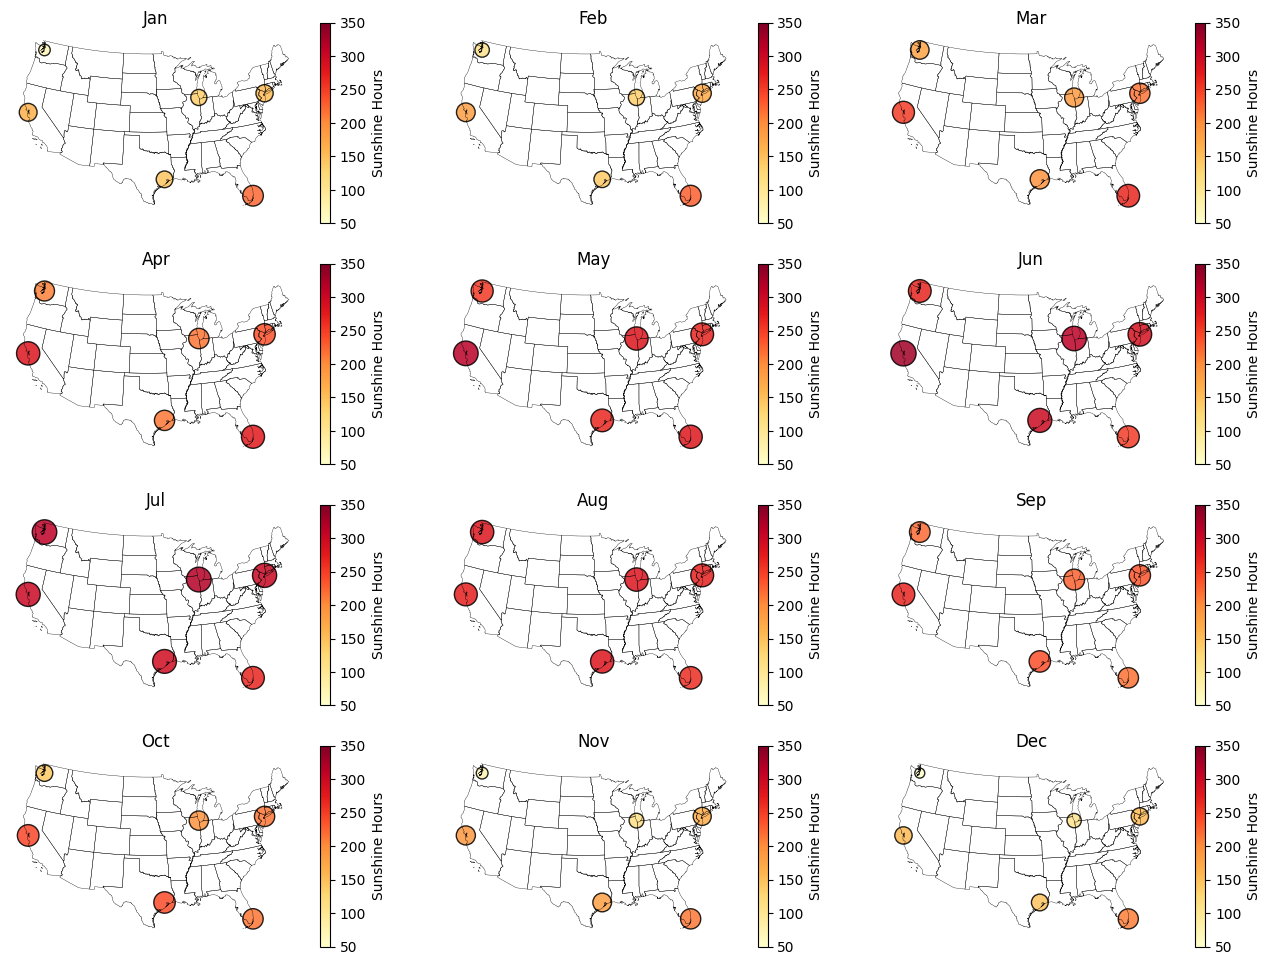

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(16, 12))

for ax, month in zip(axs.flat, city_sunshine_df.month.unique()):
    lower_48_gdf.boundary.plot(ax=ax, linewidth=.25, color='black')
    city_sunshine_gdf_subset = city_sunshine_gdf.where(city_sunshine_gdf["month"] == month)
    city_sunshine_gdf_subset.plot(
        ax=ax, column='sunshine_hours', cmap='YlOrRd', legend=True, legend_kwds={'label': "Sunshine Hours"}, markersize="sunshine_hours",
        vmin=50, vmax=350, alpha=0.85, edgecolor='black'
    )
    ax.set_title(f"{month}")

    ax.axis('off')
plt.show()